In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
import joblib
from functions import (extract_joints, plot_joints_trajectory)

In [7]:
video_file = 'videos/PHALP_Athletic_Male.mp4'

data = {}
data['demo_Athletic_Male'] = joblib.load('videos/demo_Athletic_Male.pkl')

tracklets_dict = {}

for video_name, video_result in data.items():
    tracklets_dict[video_name] = extract_joints(video_result)

print(tracklets_dict['demo_Athletic_Male'].keys())
tracklet = tracklets_dict['demo_Athletic_Male']

dict_keys([0, 1])


In [8]:
def get_frame_count(video_path):
    video_capture = cv2.VideoCapture(video_path)
    # Get the total number of frames in the video
    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    video_capture.release()

    return total_frames

print(f"We have {get_frame_count(video_file)} frames in the video")
print(f"We have {len(tracklet[0]['RAnkle'][0])} frames in the pickle file")
cam = cv2.VideoCapture(video_file)
fps = cam.get(cv2.CAP_PROP_FPS)
print(f"FPS: {fps}")

We have 139 frames in the video
We have 139 frames in the pickle file
FPS: 30.0


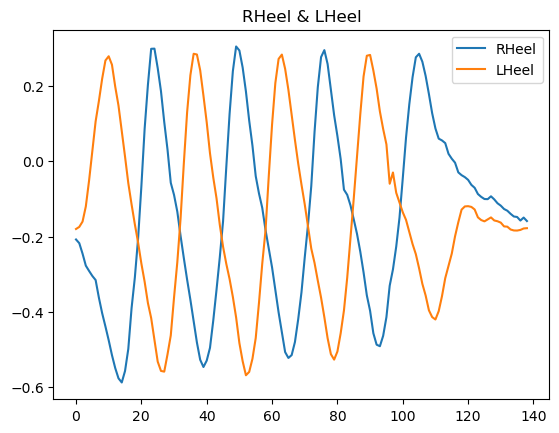

In [13]:
person_id = 1
joint_list = ['RHeel', 'LHeel']
dim = 0

plot_joints_trajectory(tracklet, person_id, joint_list, dim)

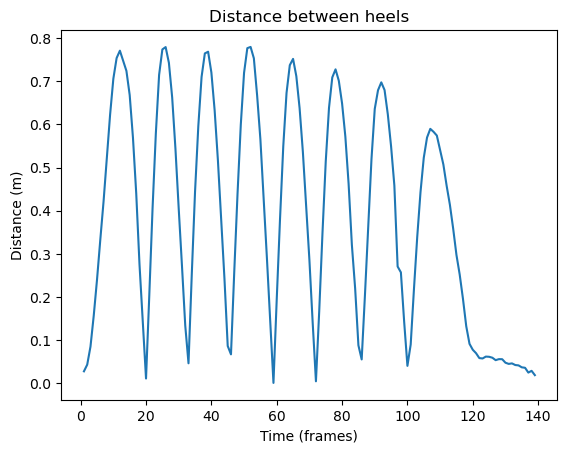

In [10]:
# Data
left_heel = tracklet[1]['LHeel'][0]
right_heel = tracklet[1]['RHeel'][0]
time_frames = np.arange(len(left_heel)) + 1

heel_distance = np.absolute(np.subtract(left_heel, right_heel))
plt.plot(time_frames, heel_distance)
plt.title('Distance between heels')
plt.xlabel('Time (frames)')
plt.ylabel('Distance (m)')
plt.show()

/tmp/ipykernel_39674/1657898591.py:37: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  p1.set_data(time_frames[i], left_heel[i])
/tmp/ipykernel_39674/1657898591.py:38: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  p2.set_data(time_frames[i], right_heel[i])


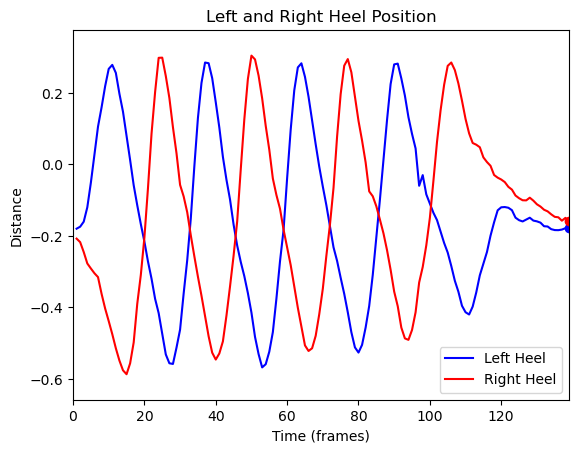

In [11]:
fig = plt.figure()

# The lines
l, = plt.plot([], [], 'b-')
l2, = plt.plot([], [], 'r-')
# The cursor points
p1, = plt.plot([], [], 'bo')
p2, = plt.plot([], [], 'ro')

plt.xlabel('Time (frames)')
plt.ylabel('Distance')
plt.title('Left and Right Heel Position')
plt.legend(['Left Heel', 'Right Heel'])

plt.xlim(0, 139)
minV = min(min(left_heel), min(right_heel))
maxV = max(max(left_heel), max(right_heel))
data_range = maxV - minV
padding = 0.08 * data_range

plt.ylim(minV - padding, maxV + padding)

metadata = dict(title='Left and Right Heel Position', artist='Niklas')
writer = FFMpegWriter(fps=fps, metadata=metadata)

xlist, ylist, ylist2 = [], [], []

with writer.saving(fig, "outputs/right-heel.mp4", 100):
    for i in range(len(time_frames)):
        xlist.append(time_frames[i])
        ylist.append(left_heel[i])
        ylist2.append(right_heel[i])

        l.set_data(xlist, ylist)
        l2.set_data(xlist, ylist2)

        p1.set_data(time_frames[i], left_heel[i])
        p2.set_data(time_frames[i], right_heel[i])
        
        writer.grab_frame()

/tmp/ipykernel_39674/701513956.py:32: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  p1.set_data(time_frames[i], heel_distance[i])


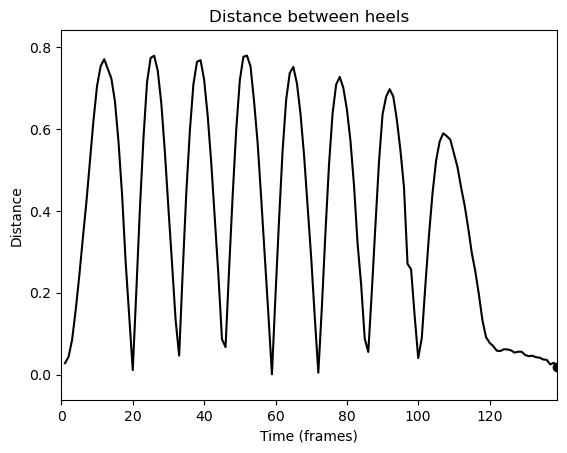

In [12]:
fig = plt.figure()

# The lines
l, = plt.plot([], [], 'k-')
# The cursor points
p1, = plt.plot([], [], 'ko')

plt.xlabel('Time (frames)')
plt.ylabel('Distance')
plt.title('Distance between heels')

plt.xlim(0, 139)
minV = min(heel_distance)
maxV = max(heel_distance)
data_range = maxV - minV
padding = 0.08 * data_range

plt.ylim(minV - padding, maxV + padding)

metadata = dict(title='Left and Right Heel Distance', artist='Niklas')
writer = FFMpegWriter(fps=fps, metadata=metadata)

xlist, ylist = [], []

with writer.saving(fig, "outputs/heel-distance.mp4", 100):
    for i in range(len(time_frames)):
        xlist.append(time_frames[i])
        ylist.append(heel_distance[i])

        l.set_data(xlist, ylist)

        p1.set_data(time_frames[i], heel_distance[i])
        
        writer.grab_frame()